In [2]:
import sys

import h5py
from scipy.ndimage import measurements
from sklearn.decomposition import PCA
import tqdm

sys.path.append('../..')

from seismiqb import *

%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pwlf

In [5]:
faults = SeismicGeometry('/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/PREDICTIONS/FAULTS/amplitudes_16_PSDM.hdf5')
cube = SeismicGeometry('/data/seismic_data/seismic_interpretation/CUBE_16_PSDM/amplitudes_16_PSDM.hdf5')

In [6]:
_faults = process_faults(faults, threshold=5, slices=(slice(590, 610), slice(None), slice(None)))

In [7]:
def plot_fault(cube, labels, index):
    if index != -1:
        non_zero = np.where(labels == index)
    else:
        non_zero = np.where(labels != 0)
    fault = labels.copy()
    if index != -1:
        fault[fault != index] = 0
    bounds = [(non_zero[i].min(), non_zero[i].max()) for i in range(3)]
    l = max(bounds[1][1]-bounds[1][0], bounds[2][1]-bounds[2][0])
    def f(slide):
        plot_image([
            cube[slide+550, :, :1000],# bounds[1][0]:bounds[1][0]+l, bounds[2][0]:bounds[2][0]+l],
            fault[slide, :, :1000]#, bounds[1][0]:bounds[1][0]+l, bounds[2][0]:bounds[2][0]+l]
        ], mode='overlap', figsize=(15, 15))
    interactive_plot = interactive(f, slide=(bounds[0][0], bounds[0][1]))
    output = interactive_plot.children[-1]
    output.layout.height = '350px'
    return interactive_plot

res = plot_fault(cube, _faults, index=-1)
res

interactive(children=(IntSlider(value=9, description='slide', max=19), Output(layout=Layout(height='350px'))),…

In [9]:
res = plot_fault(cube, faults, index=-1)

AttributeError: 'SeismicGeometryHDF5' object has no attribute 'copy'

In [2]:
set(_faults.flatten())

NameError: name '_faults' is not defined

In [13]:
# res[1].groupby('il').apply(lambda df: (df.depth.values[1:] - df.depth.values[:-1]))

In [6]:
plot_fault(cube, _faults, labels, index=indices[122])

NameError: name 'plot_fault' is not defined

In [54]:
# coords = np.where(labels[0] == 1)
arr = labels[0][..., coords[2].min():coords[2].max()+1]
arr[arr != 1] = 0

NameError: name 'coords' is not defined

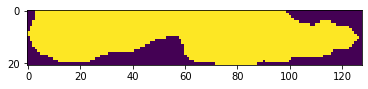

In [42]:
plt.imshow(arr[17, 330:351])
plt.show()

In [31]:
coords

(array([11, 11, 11, ..., 26, 26, 26]),
 array([330, 330, 330, ..., 351, 351, 351]),
 array([1322, 1323, 1324, ..., 1379, 1380, 1381]))

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…